# **Hand Written Digit Prediction - Classification Analysis**

-------------

## **The objective of Hand Written Digit Prediction - Classification Analysis is to develop a machine learning model that accurately classifies handwritten digits (0-9) from images. This involves data preprocessing, model training, and performance evaluation. The goal is to create a reliable digit recognition system for practical applications like automated data entry.**

## **The load_digits dataset, available in scikit-learn, is a well-known dataset for classification problems involving handwritten digits**

## **Import Library**

In [ ]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt

## **Import Data**

In [11]:
from sklearn.datasets import load_digits

In [15]:
df=load_digits()

## **Describe Data**

## The digits dataset consists of 8x8 pixel images of digits.The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.We will use these arrays to visualize the first 4 images.The target attributes of the dataset stores the digit each image represents

## **Data Visualization**

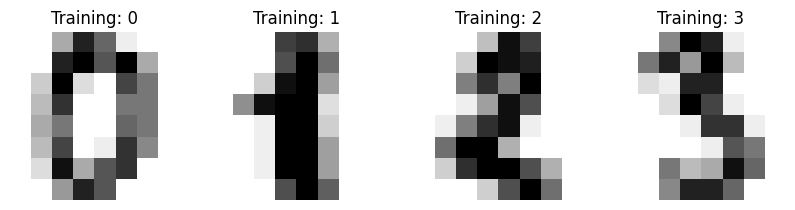

In [32]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %d" % label)

plt.show()

## **Data Preprocessing**

In [23]:
df.images.shape

(1797, 8, 8)

In [24]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [25]:
df.images[0].shape

(8, 8)

In [26]:
len(df.images)

1797

In [27]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [28]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [30]:
data[0].shape

(64,)

In [31]:
data.shape

(1797, 64)

In [33]:
data.min()

0.0

In [34]:
data.max()

16.0

In [35]:
data=data/16

In [36]:
data.min()

0.0

In [37]:
data.max()

1.0

In [38]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **Define Target Variable (y) and Feature Variables (X)**

In [39]:
X=data
y=df.target

## **Train Test Split**

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [43]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Modeling**

## **Random Forest Model**

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf=RandomForestClassifier()

In [48]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
y_pred = rf.predict(X_test)

## **Model Evaluation**

In [52]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9630


In [54]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[64  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  1  0  1  0  0]
 [ 0  0  0  0 48  0  0  0  1  1]
 [ 0  0  0  0  1 46  1  0  0  2]
 [ 1  0  0  0  0  0 62  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  3  0  0  0  0  0  1 48  0]
 [ 0  1  0  1  0  1  0  0  3 46]]


## **Prediction**

In [55]:
prediction = rf.predict(X_test)
print(prediction)

[1 7 2 2 0 6 1 1 4 7 8 9 0 1 0 7 6 3 9 5 5 7 4 8 1 2 2 3 9 8 6 7 2 7 0 5 8
 4 7 6 3 3 0 9 1 8 6 3 1 3 0 6 8 3 4 3 6 6 2 2 6 3 9 7 3 7 3 0 4 9 3 0 5 0
 8 3 5 0 8 4 1 0 5 9 7 4 3 9 2 0 2 6 0 8 3 9 6 4 9 6 0 7 9 0 5 8 4 4 5 0 4
 7 7 5 0 9 0 0 4 7 5 7 5 9 4 0 8 0 2 6 6 5 8 2 6 8 4 2 7 2 6 5 3 0 1 7 9 0
 1 8 7 5 7 7 2 0 0 9 4 6 1 7 5 0 8 8 7 4 5 6 7 1 0 5 6 2 6 5 2 5 3 8 9 2 4
 7 0 2 6 0 8 0 6 5 6 6 1 1 2 3 3 0 0 7 2 6 9 7 6 2 6 0 7 0 7 3 5 1 4 7 3 1
 1 4 5 2 0 2 5 1 7 0 5 4 7 8 7 8 4 7 2 9 9 9 2 8 9 9 9 2 9 6 1 9 0 7 7 2 9
 7 6 3 3 3 8 6 4 8 5 4 8 7 0 4 6 1 4 5 9 1 1 3 2 6 0 2 7 4 1 8 9 3 3 7 1 4
 8 4 5 1 0 0 6 2 9 0 8 5 7 1 8 8 8 6 7 4 8 6 9 1 0 2 4 9 9 3 0 8 8 0 2 0 5
 6 9 2 6 5 0 2 2 1 3 3 6 8 4 7 1 5 9 5 7 7 7 4 3 0 6 3 2 1 8 6 6 9 9 7 1 8
 2 6 3 2 4 4 9 9 3 1 6 2 9 6 1 1 1 1 6 4 5 0 7 4 9 7 8 9 2 1 4 7 4 3 0 6 5
 2 8 8 1 4 0 1 3 3 1 1 2 1 6 1 3 3 0 4 4 2 4 6 4 9 1 6 8 6 0 5 5 3 6 6 2 1
 0 3 9 5 5 7 1 3 9 8 8 7 7 0 6 4 2 3 0 9 5 1 6 1 4 2 3 2 6 1 6 1 0 3 2 3 7
 5 8 7 5 8 0 9 4 6 3 7 8 

In [58]:

input_image = np.array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
                        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
                        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
                        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
                        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
                        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
                        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
                        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

input_data = input_image.reshape(1, -1) / 16.0
print("Input data shape:", input_data.shape)


Input data shape: (1, 64)


In [60]:

predicted_label = rf.predict(input_data)

print("Predicted Label:", predicted_label[0])


Predicted Label: 1


In [57]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        65
           1       0.93      1.00      0.96        50
           2       1.00      1.00      1.00        49
           3       0.98      0.96      0.97        54
           4       0.96      0.96      0.96        50
           5       0.96      0.92      0.94        50
           6       0.98      0.98      0.98        63
           7       0.96      1.00      0.98        55
           8       0.92      0.92      0.92        52
           9       0.94      0.88      0.91        52

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



## **Explaination**

## This project focuses on handwritten digit recognition using machine learning. It utilizes the load_digits dataset, which consists of 8x8 pixel images of digits 0-9. After preprocessing the data by flattening and normalizing the pixel values, a Random Forest Classifier is trained to learn patterns from the training images. The model is evaluated on a test set to assess its accuracy in predicting handwritten digits. Users can input their own handwritten digits to receive predictions from the trained model, demonstrating its practical application in digit recognition tasks.